<a href="https://colab.research.google.com/github/juanknebel/text-mining-2020/blob/master/7_TopicModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
!pip install pyLDAvis

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from collections import Counter
import numpy as np
from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from gensim import corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import os, re, operator, warnings
warnings.filterwarnings('ignore')  
%matplotlib inline

In [0]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1,remove=('headers', 'footers', 'quotes')).data

In [0]:
STOP_WORDS = stopwords.words("english")

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS and word.isalpha() and len(word)>1]
    
texts= [tokenize(doc.lower()) for doc in dataset]


In [0]:
dictionary = corpora.Dictionary(texts)
print(len(dictionary))
dictionary.filter_extremes(no_below=10, no_above=0.5)
print(len(dictionary))

60520
9188


In [0]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [0]:
lsimodel = LsiModel(corpus=corpus, num_topics=25, id2word=dictionary)

In [0]:
lsimodel.print_topics(10,4)


[(0, '-0.996*"max" + -0.055*"giz" + -0.029*"wm" + -0.027*"qax"'),
 (1, '0.259*"file" + 0.232*"one" + 0.166*"use" + 0.161*"would"'),
 (2, '0.948*"db" + 0.148*"cs" + 0.124*"bh" + 0.103*"byte"'),
 (3, '0.530*"file" + 0.192*"output" + -0.188*"people" + -0.169*"said"'),
 (4, '-0.440*"file" + -0.226*"output" + 0.190*"available" + 0.161*"image"'),
 (5, '-0.491*"jpeg" + -0.311*"image" + -0.208*"file" + -0.199*"gif"'),
 (6, '0.280*"file" + -0.268*"output" + -0.231*"entry" + 0.189*"gun"'),
 (7, '-0.249*"hockey" + -0.212*"jpeg" + -0.195*"league" + -0.173*"team"'),
 (8, '0.299*"wire" + 0.271*"wiring" + 0.187*"jpeg" + 0.151*"neutral"'),
 (9, '-0.331*"disk" + -0.308*"drive" + -0.262*"drives" + -0.229*"hard"')]

In [0]:
ldamodel = LdaModel(corpus=corpus, num_topics=25, id2word=dictionary, iterations = 2000, passes=10)


In [0]:
ldamodel.print_topics(10, 6)

[(24,
  '0.009*"israel" + 0.008*"law" + 0.007*"would" + 0.007*"jews" + 0.007*"people" + 0.006*"human"'),
 (13,
  '0.032*"window" + 0.015*"set" + 0.015*"use" + 0.013*"mouse" + 0.012*"widget" + 0.012*"application"'),
 (12,
  '0.026*"game" + 0.024*"team" + 0.019*"year" + 0.018*"games" + 0.014*"season" + 0.012*"players"'),
 (20,
  '0.039*"gun" + 0.032*"output" + 0.020*"guns" + 0.018*"printf" + 0.016*"control" + 0.014*"modem"'),
 (16,
  '0.042*"god" + 0.023*"jesus" + 0.014*"one" + 0.013*"bible" + 0.013*"christian" + 0.011*"church"'),
 (10,
  '0.027*"period" + 0.023*"new" + 0.021*"turkey" + 0.020*"san" + 0.018*"la" + 0.017*"pp"'),
 (8,
  '0.051*"wm" + 0.027*"mr" + 0.026*"ah" + 0.020*"ax" + 0.018*"air" + 0.017*"gk"'),
 (14,
  '0.029*"armenian" + 0.024*"armenians" + 0.021*"turkish" + 0.020*"war" + 0.015*"russian" + 0.013*"people"'),
 (0,
  '0.060*"drive" + 0.035*"disk" + 0.026*"hard" + 0.024*"scsi" + 0.020*"drives" + 0.018*"controller"'),
 (23,
  '0.025*"government" + 0.023*"encryption" + 0.01

In [0]:
new_text = """Gun politics is an area of American politics defined by two primary opposing ideologies about civilian gun ownership. 
People who advocate for gun control support increasing regulations related to gun ownership. 
people who advocate for gun rights support decreasing regulations related to gun ownership. 
These groups often disagree on the interpretation of laws and court cases related to firearms as well as about the effects of firearms regulation on crime and public safety. 
It is estimated that U.S. civilians own 393 million firearms, and that 35% to 42% of the households in the country have at least one gun"""

# transform held_out_text into the bag-of-words space
bow_vector = dictionary.doc2bow(tokenize(new_text))
lda_vector = ldamodel[bow_vector]
print(lda_vector)
# print the document's single most prominent LDA topic
print(ldamodel.print_topic(max(lda_vector, key=lambda item: item[1])[0]))

[(4, 0.08726988), (9, 0.38944215), (12, 0.024051806), (14, 0.037439484), (20, 0.23498933), (24, 0.21246774)]
0.008*"government" + 0.007*"state" + 0.006*"president" + 0.006*"us" + 0.006*"right" + 0.006*"money" + 0.006*"states" + 0.006*"american" + 0.006*"bill" + 0.005*"year"


In [0]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
22     0.232271 -0.125399       1        1  13.827618
11     0.202817 -0.042116       2        1   9.499674
21     0.029235  0.216931       3        1   8.303975
24     0.085990 -0.002739       4        1   6.798295
17     0.160072  0.048008       5        1   5.933753
9      0.013801  0.035689       6        1   5.185612
6      0.103695 -0.190241       7        1   5.064606
16     0.150749 -0.099225       8        1   4.485679
4     -0.075520  0.104146       9        1   4.409243
2      0.103407  0.088520      10        1   3.778171
3      0.137820  0.005888      11        1   3.763478
5      0.099115 -0.011050      12        1   3.595453
12     0.003602 -0.152996      13        1   3.335590
18    -0.082157  0.097559      14        1   2.624130
7     -0.107423  0.022963      15        1   2.533008
13     0.049254  0.106972      16        1   2.477608
14    -0.086425 -0.088258      17        1   2.312945
19     0.075919 -0.110158      18        1   2.294603
23    -0.015844  0.154755      19        1   1.998055
0     -0.101331  0.135656      20        1   1.874884
20    -0.109953  0.141976      21        1   1.693265
10    -0.254819 -0.132995      22        1   1.532003
8     -0.268724 -0.120228      23        1   1.050223
15    -0.075227  0.033623      24        1   0.879197
1     -0.270327 -0.117283      25        1   0.748931, topic_info=         Term         Freq        Total Category  logprob  loglift
5678      max  4391.000000  4391.000000  Default  30.0000  30.0000
1480      god  1779.000000  1779.000000  Default  29.0000  29.0000
347       use  3180.000000  3180.000000  Default  28.0000  28.0000
144     drive  1075.000000  1075.000000  Default  27.0000  27.0000
129     would  6420.000000  6420.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
5877    micro    24.428190    30.051296  Topic25  -5.5987   4.6871
6157       rm    28.084599    36.140369  Topic25  -5.4592   4.6421
8242      pex    27.637825    37.542175  Topic25  -5.4753   4.5880
2231  quantum    28.518003    56.580948  Topic25  -5.4439   4.2091
251        gl    14.791655    40.380421  Topic25  -6.1004   3.8900

[1619 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4641      8  0.029602  absolute
4641     12  0.902848  absolute
4641     14  0.051803  absolute
4641     19  0.014801  absolute
3850      2  0.081023        ac
...     ...       ...       ...
1443     13  0.037893      york
1443     17  0.017224      york
1443     22  0.723417      york
8448     24  0.982916   zionism
8792     12  0.980977   zionist

[4830 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[23, 12, 22, 25, 18, 10, 7, 17, 5, 3, 4, 6, 13, 19, 8, 14, 15, 20, 24, 1, 21, 11, 9, 16, 2])

In [0]:
lsitopics  = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(25,formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(25,formatted=False)]

In [0]:
lsa_coherence = CoherenceModel(topics=lsitopics, texts=texts, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()
lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()

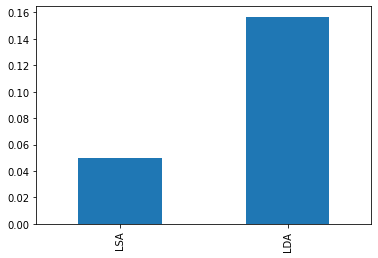

In [0]:
df_lda = pd.DataFrame([range(25),lda_coherence,ldatopics],index=['topic_id','coherence','topic']).transpose()
df_lsa = pd.DataFrame([range(25),lsa_coherence,lsitopics],index=['topic_id','coherence','topic']).transpose()
pd.Series({'LSA':np.mean(lsa_coherence),'LDA':np.mean(lda_coherence)}).plot.bar();

In [0]:
df_lda.sort_values(by='coherence',ascending=False)[:10]

,topic_id,coherence,topic
1,1,0.552423,"[max, giz, qax, ql, nuy, nrhj, sl, xm, nriz, w..."
0,0,0.42031,"[drive, disk, hard, scsi, drives, controller, ..."
23,23,0.314842,"[government, encryption, clipper, law, privacy..."
8,8,0.312977,"[wm, mr, ah, ax, air, gk, mq, lg, mv, cs]"
14,14,0.312589,"[armenian, armenians, turkish, war, russian, p..."
7,7,0.30772,"[space, nasa, launch, satellite, earth, missio..."
12,12,0.298321,"[game, team, year, games, season, players, pla..."
16,16,0.207033,"[god, jesus, one, bible, christian, church, ch..."
21,21,0.206739,"[file, available, program, files, version, sof..."
4,4,0.173672,"[university, national, research, information, ..."
